In [1]:
setwd('/import/DB/zhang/bulk/')

In [2]:
load('./data1.rda')
head(data1,2)
library(dplyr)
expr = data1
head(expr,2)
Type=c(rep(1,23),rep(0,13)) 
Type
x = as.matrix(expr)
y = Type

,ACHE,BVES,MYLIP,OPTN,MTMR2,EHD3,PHETA2,ANXA2,PLEKHJ1,CDK5,...,BECN1,ITCH,SNX25,PCSK9,FURIN,AP1AR,TGFB1,ARFGEF2,PHETA1,TBC1D16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM6733214_T103,1.5502254,0.7751127,5.425789,44.43979,25.32035,2.583709,9.818094,534.3110,36.68867,14.46877,...,40.30586,4.650676,1.033484,6.459272,5.167418,8.526240,0.5167418,2.842080,24.80361,14.98551
GSM6733215_T105,0.3841613,2.3049676,16.134773,49.94096,10.37235,12.485241,33.998272,793.6772,47.05975,49.94096,...,24.39424,11.716918,3.841613,1.920806,57.432109,6.530741,33.8061910,6.722822,146.74960,29.77250


Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,ACHE,BVES,MYLIP,OPTN,MTMR2,EHD3,PHETA2,ANXA2,PLEKHJ1,CDK5,...,BECN1,ITCH,SNX25,PCSK9,FURIN,AP1AR,TGFB1,ARFGEF2,PHETA1,TBC1D16
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM6733214_T103,1.5502254,0.7751127,5.425789,44.43979,25.32035,2.583709,9.818094,534.3110,36.68867,14.46877,...,40.30586,4.650676,1.033484,6.459272,5.167418,8.526240,0.5167418,2.842080,24.80361,14.98551
GSM6733215_T105,0.3841613,2.3049676,16.134773,49.94096,10.37235,12.485241,33.998272,793.6772,47.05975,49.94096,...,24.39424,11.716918,3.841613,1.920806,57.432109,6.530741,33.8061910,6.722822,146.74960,29.77250


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

In [4]:
library(lars) 
library(glmnet) 

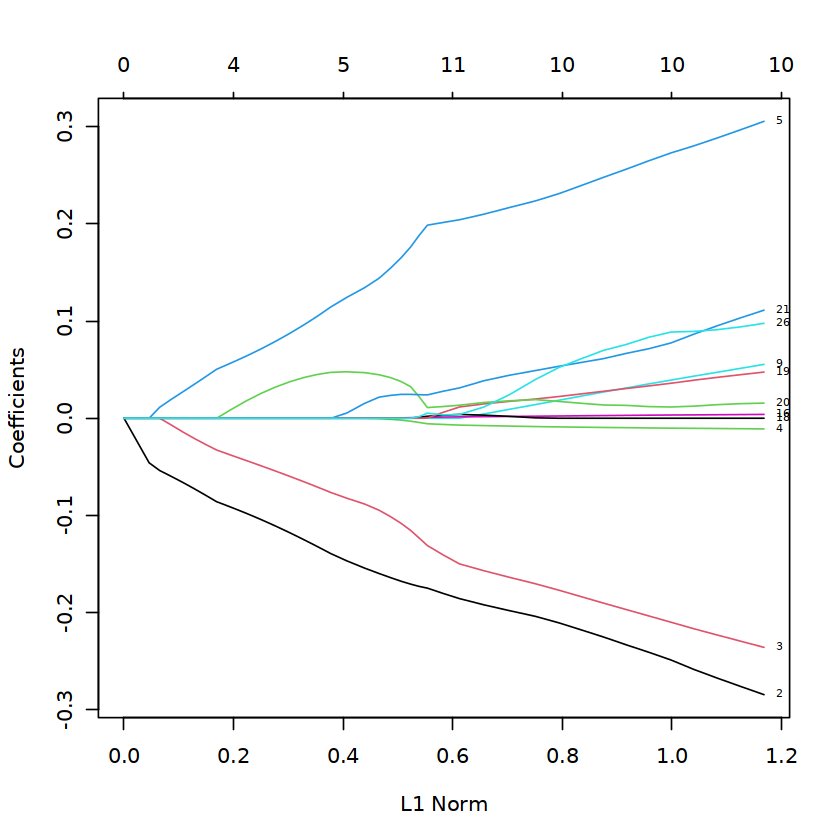

In [5]:

#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=50, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

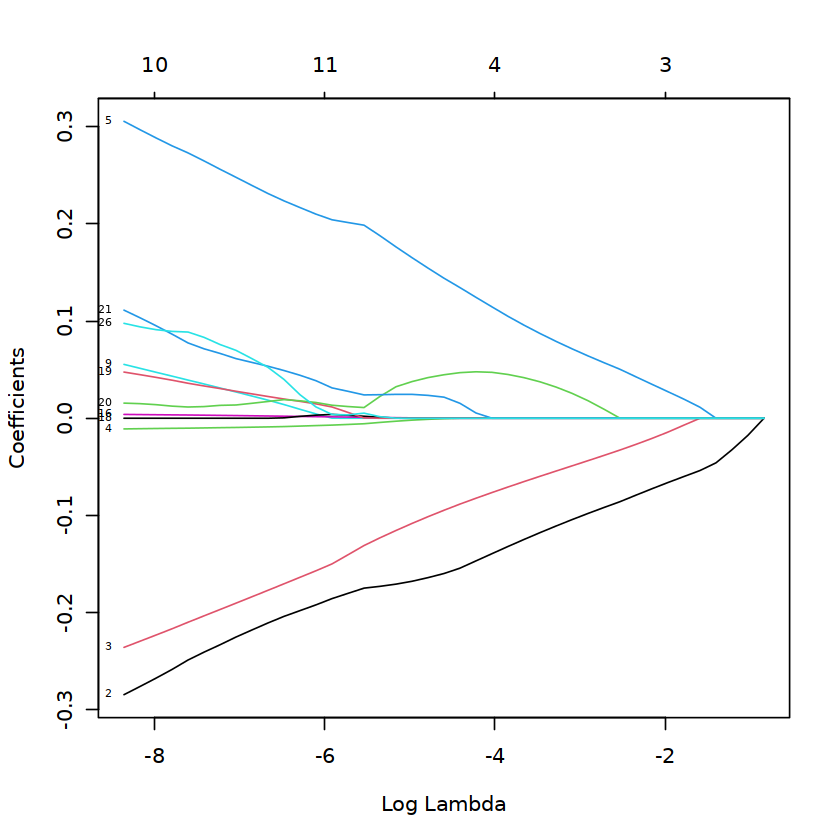

In [6]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [7]:
cv_fit <- cv.glmnet(x=as.matrix(x), y=y, alpha = 1, nlambda = 100)

[1] 0.03503671 0.08093933

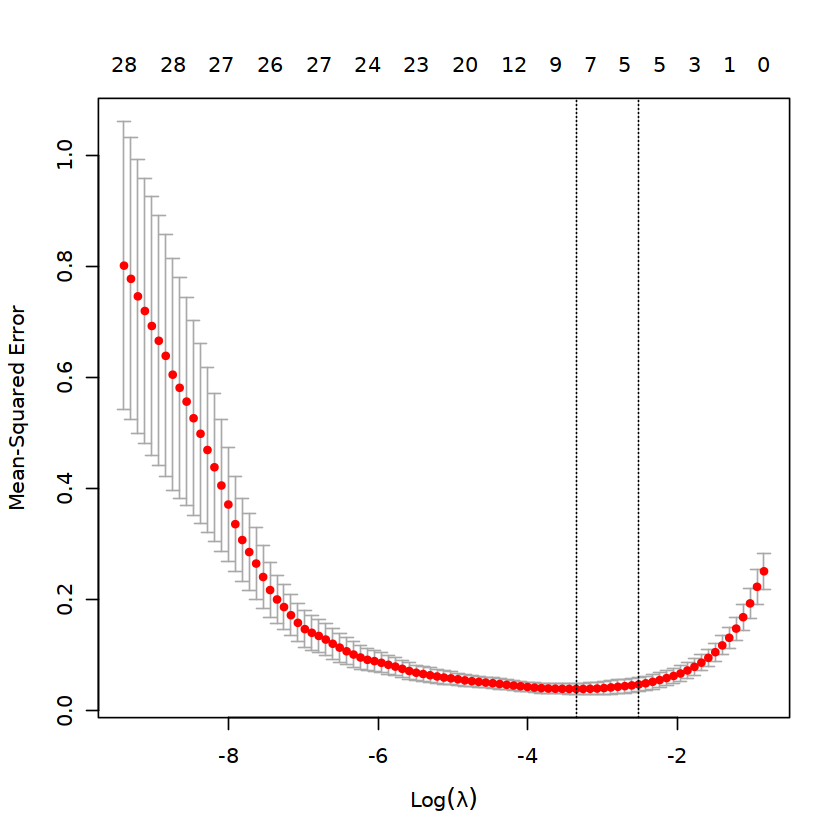

In [8]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [18]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min)

In [19]:

gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]

In [20]:
gene_1se = gsub('[.]',' ',gene_1se)

In [21]:
gene_1se

[1] "BVES"   "MYLIP"  "OPTN"   "MTMR2"  "FUT8"   "CHMP5"  "LAPTM5" "ITCH"  
[9] "AP1AR"

In [17]:
save(gene_1se,file = 'lasso.cell.rda')